# Bank Customers Drop Out Prediction

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
dataset = pd.read_csv('Bank_Churn.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Exploratory Data Analysis

In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


In [7]:
dataset.shape

(10000, 14)

In [8]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,Sharpe,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,Lavine,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [10]:
a = dataset.Exited.sum()
a

2037

In [11]:
b = len(dataset[dataset['Exited'] == 0])
b

7963

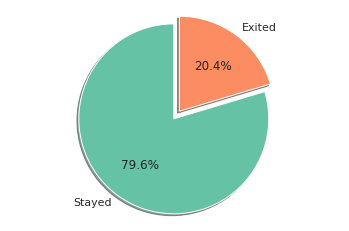

In [12]:
labels = 'Stayed', 'Exited'
sizes = [b, a]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


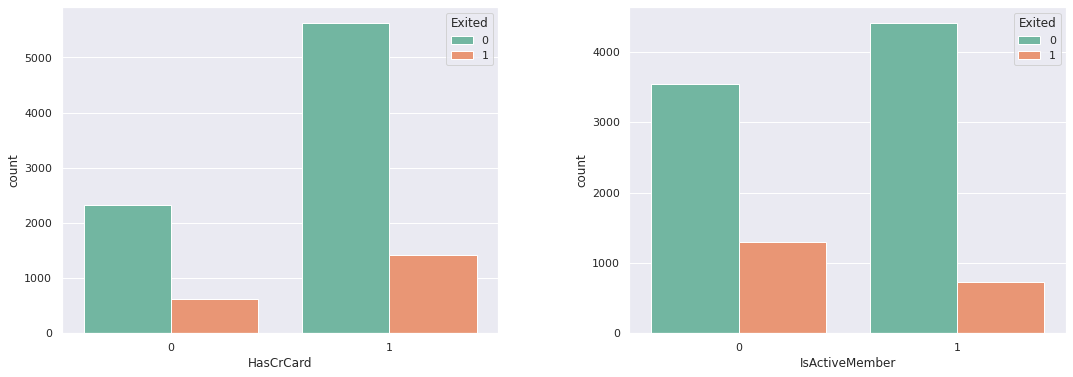

In [13]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[0])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


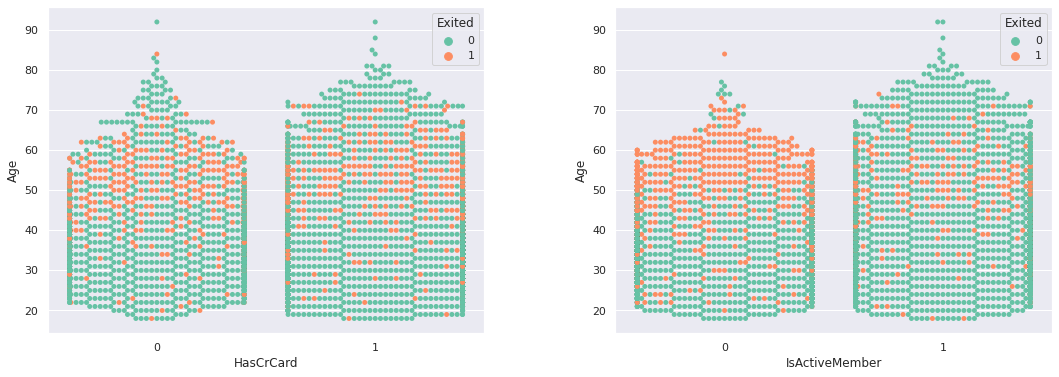

In [14]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = dataset, ax = ax[1])

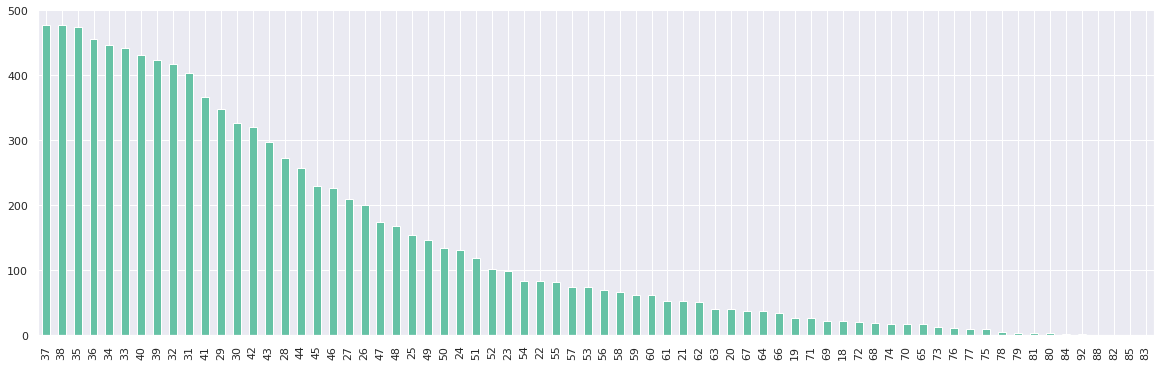

In [15]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

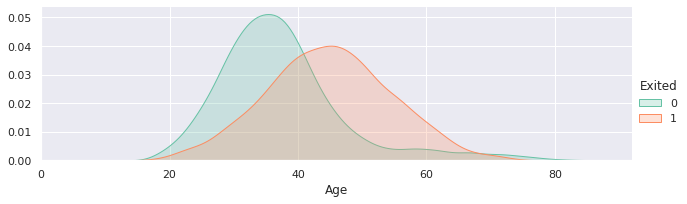

In [16]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


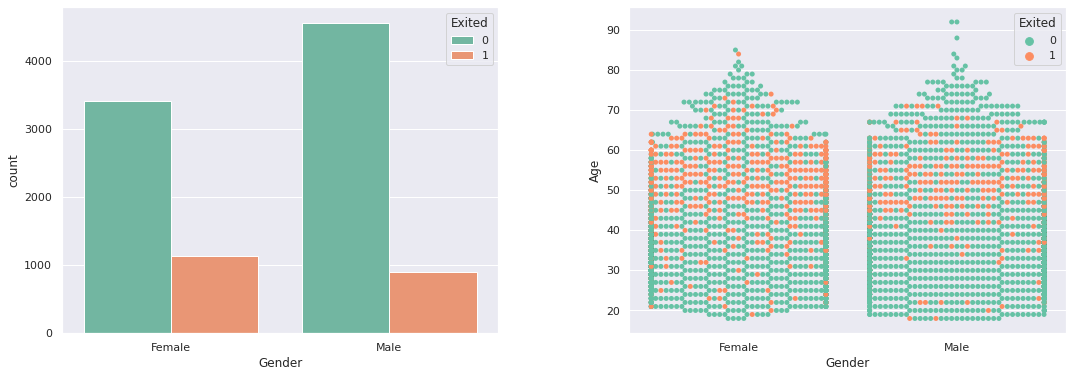

In [17]:
_, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "Gender", hue="Exited", data = dataset, ax= ax[0])
sns.swarmplot(x = "Gender", y = "Age", data = dataset, hue="Exited", ax = ax[1])



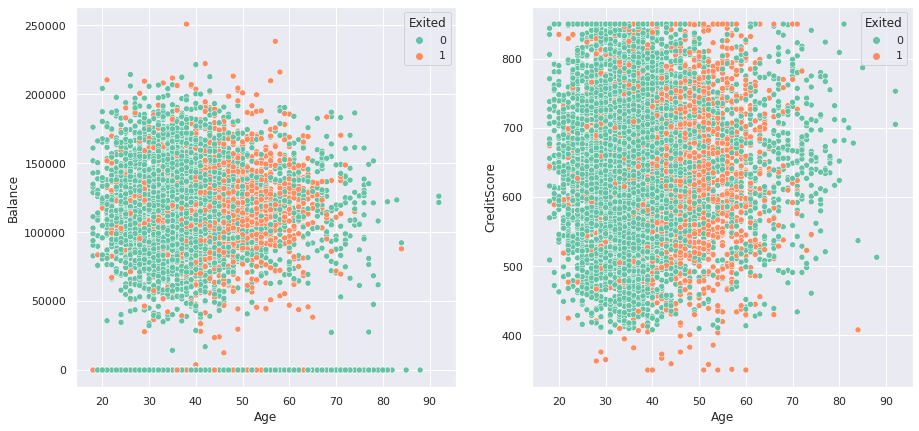

In [18]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


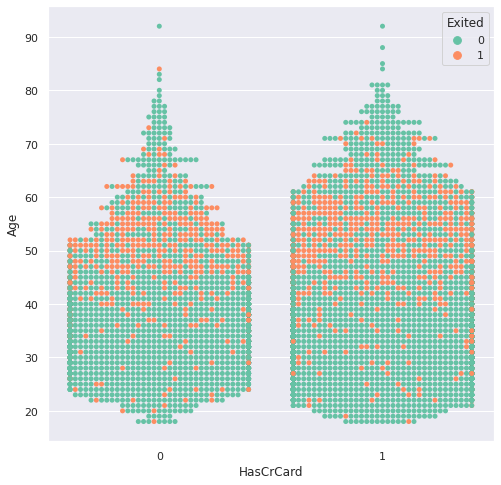

In [19]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited")

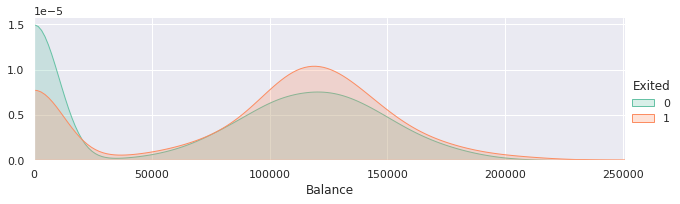

In [20]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()

plt.show()

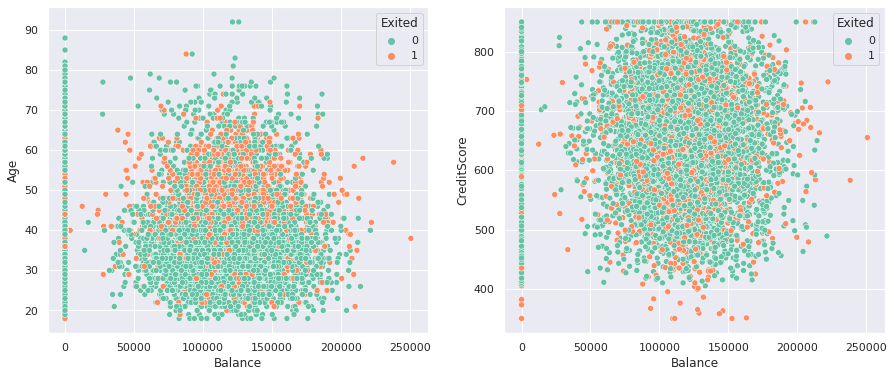

In [21]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = dataset, hue="Exited", ax = ax[1])

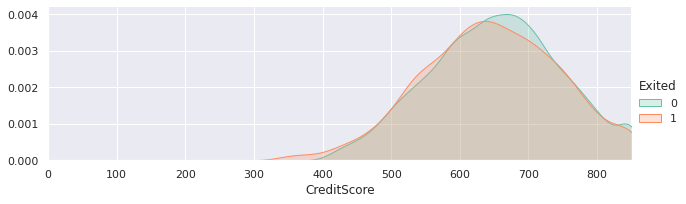

In [22]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()

plt.show()

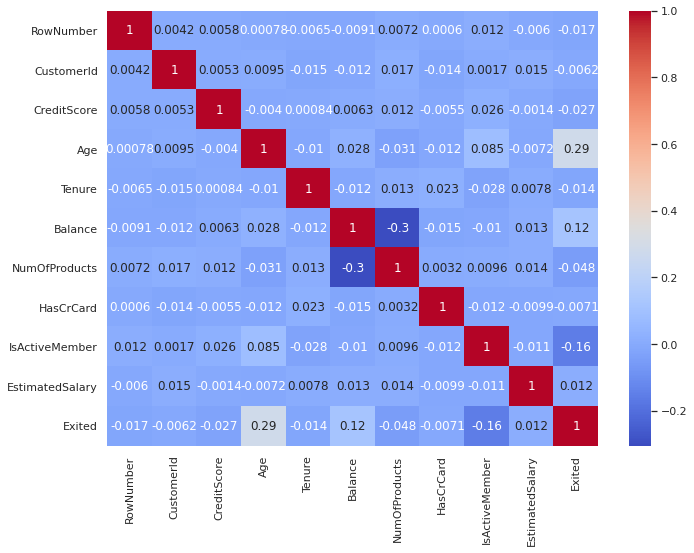

In [23]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()

### Encoding categorical data

Label Encoding the "Gender" column

In [24]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [25]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [26]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Logistic Regression


In [30]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.811

In [31]:
Accuracy = accuracy_score(pred, y_test)
Precision = precision_score(pred, y_test)
Recall =  recall_score(pred, y_test)
F1 = f1_score(pred, y_test)
AUC = roc_auc_score(pred, y_test)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1:", F1)
print("AUC:", AUC)

Accuracy: 0.811
Precision: 0.23703703703703705
Recall: 0.5818181818181818
F1: 0.3368421052631579
AUC: 0.7067129056229875


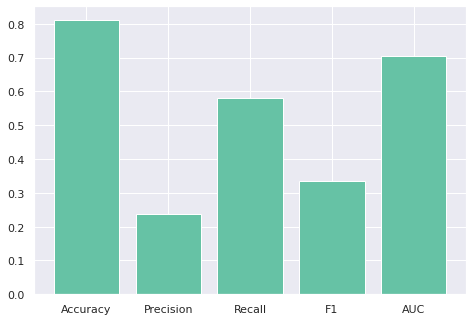

In [32]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
citeria = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
score = [0.811,0.237,.581,0.336,0.706]
ax.bar(citeria,score)
axes = plt.gca()
#axes.set_ylim([.75,.9])
plt.show()

Text(21.5, 0.5, 'Truth')

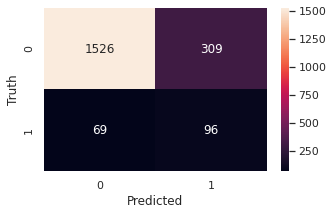

In [34]:
cm = confusion_matrix(pred, y_test)
accuracy_score(pred, y_test)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Part 3 - Random Forest

In [35]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.868

In [36]:
Accuracy = accuracy_score(pred, y_test)
Precision = precision_score(pred, y_test)
Recall =  recall_score(pred, y_test)
F1 = f1_score(pred, y_test)
AUC = roc_auc_score(pred, y_test)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1:", F1)
print("AUC:", AUC)

Accuracy: 0.868
Precision: 0.5160493827160494
Recall: 0.7545126353790613
F1: 0.6129032258064516
AUC: 0.8203787785136747


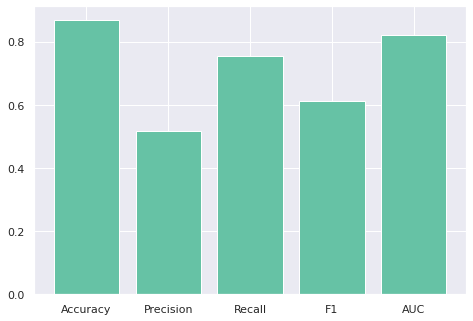

In [37]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
citeria = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
score = [0.868,0.516,0.754,0.612,0.820]
ax.bar(citeria,score)
axes = plt.gca()
#axes.set_ylim([.75,.9])
plt.show()

Text(21.5, 0.5, 'Truth')

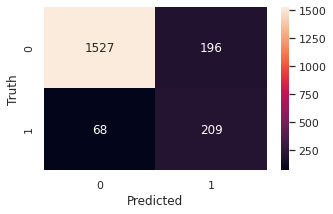

In [39]:
cm = confusion_matrix(pred, y_test)
accuracy_score(pred, y_test)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Part 4 - Extreme Gradient Boosting Tree Gradient Boosting Tree (XGBoost)

In [40]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8515

In [41]:
Accuracy = accuracy_score(pred, y_test)
Precision = precision_score(pred, y_test)
Recall =  recall_score(pred, y_test)
F1 = f1_score(pred, y_test)
AUC = roc_auc_score(pred, y_test)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1:", F1)
print("AUC:", AUC)

Accuracy: 0.8515
Precision: 0.5037037037037037
Recall: 0.68
F1: 0.5787234042553191
AUC: 0.7808823529411765


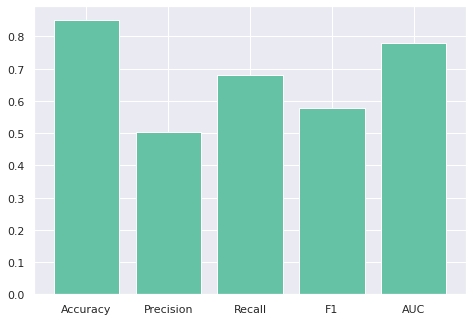

In [42]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
citeria = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
score = [0.851,0.503,0.68,0.578,0.780]
ax.bar(citeria,score)
axes = plt.gca()
#axes.set_ylim([.75,.9])
plt.show()

Text(21.5, 0.5, 'Truth')

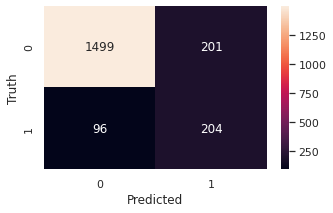

In [44]:
cm = confusion_matrix(pred, y_test)
accuracy_score(pred, y_test)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Part 5 - Artificial Neural Network

### Initializing the ANN

In [45]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [46]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

### Adding the second hidden layer

In [47]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [48]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

### Adding the output layer

In [49]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##  Training the ANN

### Compiling the ANN

In [50]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [51]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7947
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8024
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8196
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8236
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8309
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8386
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3773 - accura

## Making the predictions and evaluating the model

### Predicting the Test set results

In [52]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [53]:
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall =  recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1:", F1)
print("AUC:", AUC)

Accuracy: 0.8565
Precision: 0.702054794520548
Recall: 0.5061728395061729
F1: 0.5882352941176471
AUC: 0.7258136924803592


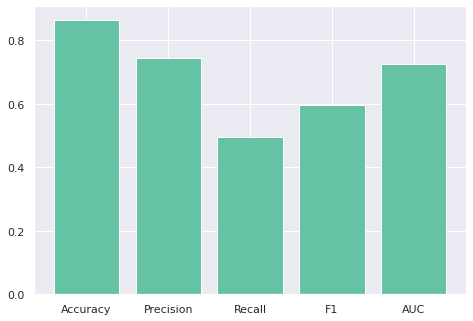

In [54]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
citeria = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
score = [0.8635,0.744,0.496,.595,0.726]
ax.bar(citeria,score)
axes = plt.gca()
#axes.set_ylim([.75,.9])
plt.show()

Text(21.5, 0.5, 'Truth')

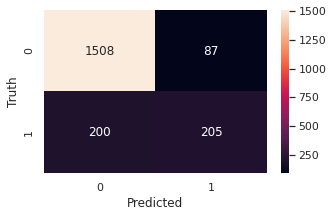

In [55]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Comparing the Models together

In [56]:
models = ["Logistic Regression", "Random Forest", "XGBoost", "ANN"]
Accuracy = [0.811, 0.868, 0.851, 0.863]
Precision = [0.237, 0.516, 0.503, 0.744]
Recall = [0.582, 0.754, 0.68, 0.496]
F1 = [0.337, 0.612, 0.578, .595]
AUC= [0.706, 0.820, 0.780, 0.726]

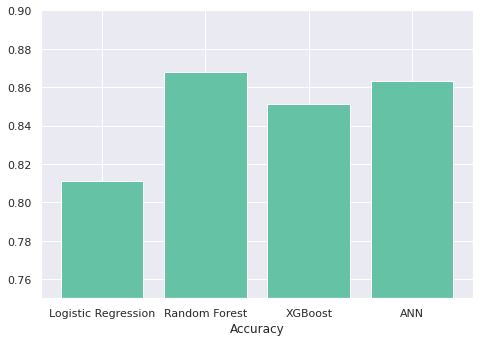

In [57]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(models,Accuracy)
axes = plt.gca()
axes.set_ylim([.75,.9])
plt.xlabel("Accuracy")
plt.show()

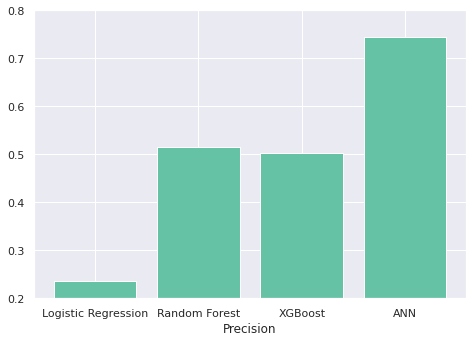

In [58]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(models,Precision)
axes = plt.gca()
axes.set_ylim([.2,.8])
plt.xlabel("Precision")
plt.show()

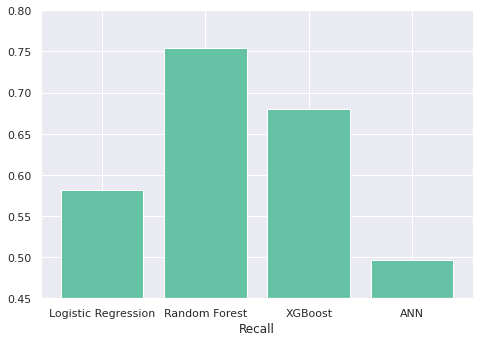

In [59]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(models,Recall)
axes = plt.gca()
axes.set_ylim([.45,.8])
plt.xlabel("Recall")
plt.show()

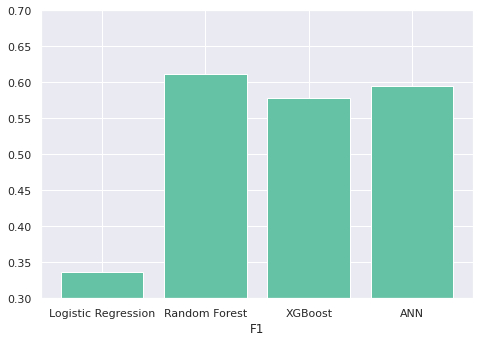

In [60]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(models,F1)
axes = plt.gca()
axes.set_ylim([.3,.7])
plt.xlabel("F1")
plt.show()

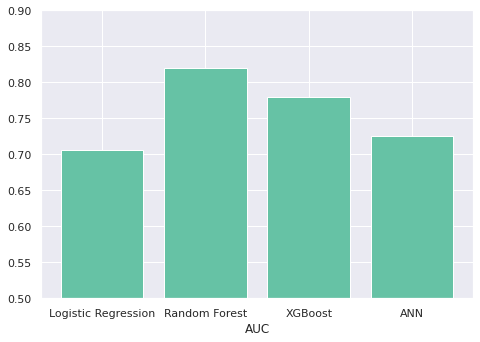

In [61]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(models,AUC)
axes = plt.gca()
axes.set_ylim([.5,.9])
plt.xlabel("AUC")
plt.show()

In [62]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!